# General Approaches

## Util-Class

In [20]:
class CLASSINIT:
  pass
class PROCESS:
  pass
class RESULT:
  pass
class OPERATIONS:
  pass
class DOCUMENTATION:
  pass
class ERROR:
  pass
class CONSTANT:
  pass
class VISUAL:
  pass
class NULL:
  pass

## Util-Constants

> conversion constants to atomic units

In [2]:
mE = 1.0
A = 1.8897261246257702 # angstroms (Å)
Å = 1.8897261246257702 # angstroms (Å)
hBar = 1.0
k = hBar**2/(2*mE)
eV = 0.03674932217565499
femtoseconds = 4.134137333518212 * 10.

## Util-Module

> requirements

In [18]:
import numpy as np,matplotlib as mtb,matplotlib.pyplot as plt,time
from scipy.sparse import eye,kron,diags
from abc import ABC, abstractmethod
from scipy.sparse.linalg import eigs
from ipywidgets import interact, FloatSlider

### Practice For Project

> np.linspace(start, stop, num) generates num evenly spaced samples, calculated over the interval [start, stop]

$x_i = x_{\text{start}} + i \cdot \frac{x_{\text{stop}} - x_{\text{start}}}{n - 1}$

In [4]:
np.linspace(-10*Å,10*Å,5)

array([-18.89726125,  -9.44863062,   0.        ,   9.44863062,
        18.89726125])

> np.exp(x) calculates the exponential of all elements in the input array x. Used to calculate the exponential part of the Gaussian wave packet.

> Gaussian Wave Packet: $\Psi(x) = e^{-\frac{(x - x_0)^2}{4\sigma^2}}$

In [5]:
σ = 1.0*Å

In [6]:
np.exp(-1/(4*σ**2)*((1.4-0)**2))

0.8717836662073352

> np.where(condition, x, y) returns elements chosen from x or y depending on condition. It's used to define the potential grid representing the slits.

In [9]:
aExample = np.random.randn(2,3)
aExample

array([[ 0.71553453,  0.2760901 ,  1.7701052 ],
       [-1.96459619, -0.25396494, -0.85337465]])

In [10]:
bResult = np.where(aExample>0,aExample,0)
bResult

array([[0.71553453, 0.2760901 , 1.7701052 ],
       [0.        , 0.        , 0.        ]])

> np.abs(x) calculates the absolute value element-wise. Used to calculate the magnitude of the wave function, which is related to the probability density in quantum mechanics.

> Probability Density = $P(x) = |\Psi(x)|^2$

In [11]:
np.abs(-2)

2

> np.real(x) returns the real part of the complex-valued input x. It could be used to extract the real part of a complex wave function or other complex quantities.

In [13]:
np.real(5+2j)

5.0

In [14]:
np.real(2j)

0.0

> np.fft.fftfreq(n, d) returns the Discrete Fourier Transform sample frequencies.

> np.fft.fftshift(x) shifts the zero-frequency component to the center of the spectrum.

> They are useful in quantum mechanics for transforming from position to momentum space.

> Fourier Transform = $F(k) = \int_{-\infty}^{\infty} f(x) e^{-2\pi ikx} dx$

### Additional Applications

> Quantum Harmonic Oscillator Hamiltonian
In quantum mechanics, the Hamiltonian of a one-dimensional harmonic oscillator is given by:

$H = \frac{p^2}{2m} + \frac{1}{2}m\omega^2 x^2$

where:
- $H$: the Hamiltonian
- $p$: the momentum operator
- $m$: the mass of the particle
- $\omega$: the angular frequency
- $x$: the position operator

**This formula encapsulates the total energy (kinetic plus potential energy) of the quantum harmonic oscillator**

In [2]:
mExample = 1.0 # Mass
omegaExample = 1.0 # Angular frequency
NExample = 100 # Grid size
hbarExample = 1.0 # Reduced Planck's constant
dxExample = 0.1 # Grid spacing

In [3]:
xPositionExample = np.linspace(-5,5,NExample) # Position grid
xPositionExample

array([-5.        , -4.8989899 , -4.7979798 , -4.6969697 , -4.5959596 ,
       -4.49494949, -4.39393939, -4.29292929, -4.19191919, -4.09090909,
       -3.98989899, -3.88888889, -3.78787879, -3.68686869, -3.58585859,
       -3.48484848, -3.38383838, -3.28282828, -3.18181818, -3.08080808,
       -2.97979798, -2.87878788, -2.77777778, -2.67676768, -2.57575758,
       -2.47474747, -2.37373737, -2.27272727, -2.17171717, -2.07070707,
       -1.96969697, -1.86868687, -1.76767677, -1.66666667, -1.56565657,
       -1.46464646, -1.36363636, -1.26262626, -1.16161616, -1.06060606,
       -0.95959596, -0.85858586, -0.75757576, -0.65656566, -0.55555556,
       -0.45454545, -0.35353535, -0.25252525, -0.15151515, -0.05050505,
        0.05050505,  0.15151515,  0.25252525,  0.35353535,  0.45454545,
        0.55555556,  0.65656566,  0.75757576,  0.85858586,  0.95959596,
        1.06060606,  1.16161616,  1.26262626,  1.36363636,  1.46464646,
        1.56565657,  1.66666667,  1.76767677,  1.86868687,  1.96

In [5]:
diagonalExample = np.full(NExample,-2.0)
diagonalExample

array([-2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2.])

In [8]:
offDiagonalExample = np.ones(NExample-1)
offDiagonalExample

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

> We use the `diags` function to create a tridiagonal matrix, representing the second derivative in the kinetic energy term.

**The main diagonal (diagonal) is filled with -2, and the off-diagonals (off_diagonal) are filled with 1. This is a discretization of the kinetic energy operator using the finite difference method.**

> $T = -\frac{\hbar^2}{2m\Delta x^2} \begin{bmatrix} -2 & 1 & 0 & \cdots & 0 \\ 1 & -2 & 1 & \cdots & 0 \\ 0 & 1 & -2 & \cdots & 0 \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & 0 & \cdots & -2 \end{bmatrix}$

In [14]:
kineticEnergyTExample = diags([diagonalExample,offDiagonalExample,offDiagonalExample],[0,-1,1]) # Kinetic Energy (T) Operator
kineticEnergyTExample.toarray()

array([[-2.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1., -2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1., -2.]])

In [15]:
kineticEnergyTExample *= -hbarExample**2/(2*mExample*dxExample**2)
kineticEnergyTExample.toarray()

array([[100., -50.,   0., ...,   0.,   0.,   0.],
       [-50., 100., -50., ...,   0.,   0.,   0.],
       [  0., -50., 100., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ..., 100., -50.,   0.],
       [  0.,   0.,   0., ..., -50., 100., -50.],
       [  0.,   0.,   0., ...,   0., -50., 100.]])

> The potential energy term is diagonal with $V = \frac{1}{2} m \omega^2 x^2$ on the diagonal.

In [16]:
potentialEnergyVExample = 0.5*mExample*omegaExample**2*xPositionExample**2
potentialEnergyVExample = diags([potentialEnergyVExample],[0]) # Potential Energy (V) Operator
potentialEnergyVExample.toarray()

array([[12.5       ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , 12.00005102,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , 11.51030507, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 11.51030507,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        12.00005102,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 12.5       ]])

> The Hamiltonian is the sum of the kinetic and potential energy operators: $H = T + V$

In [11]:
hamiltonianOperatorExample = kineticEnergyTExample+potentialEnergyVExample # Hamiltonian (H) Operator

In [12]:
hamiltonianDenseMatrixExample = hamiltonianOperatorExample.toarray()
hamiltonianDenseMatrixExample # Converting to dense matrix for demonstration purposes

array([[112.5       , -50.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [-50.        , 112.00005102, -50.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , -50.        , 111.51030507, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 111.51030507,
        -50.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ..., -50.        ,
        112.00005102, -50.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
        -50.        , 112.5       ]])

> The script sets up the Hamiltonian for a quantum harmonic oscillator and solves for its eigenstates using the eigs function from SciPy. This interactive script is a great tool for visualizing and understanding the behavior of a quantum harmonic oscillator under various conditions.

In [17]:
reducedPlanckConstant_hBar = 1.0
numberofPoints_N = 500
positionGrid_X = np.linspace(-5,5,numberofPoints_N)
spacingGrid_DX = positionGrid_X[1]-positionGrid_X[0]

> **Eigenvalues** are a set of scalars associated with a linear system of equations, or more technically, with a linear transformation of a vector space, each eigenvalue corresponds to an energy level of the system. Specifically, for the quantum harmonic oscillator, these eigenvalues represent the quantized energy levels that the system can occupy.

> **Eigenvectors** are the vectors associated with these eigenvalues. An eigenvector of a linear transformation (or matrix) is a non-zero vector that only changes by a scalar factor when that linear transformation is applied to it. In quantum mechanics, an eigenvector of the Hamiltonian represents a state of the system with a definite energy (the corresponding eigenvalue). For the quantum harmonic oscillator, each eigenvector represents a quantum state (or wave function) of the system at a specific energy level.

In [30]:
def QuantumHarmonicOscillator(massOfParticle:int or float,omegaValue:int or float,stateInitial:int or float)->OPERATIONS:
  diagonal = np.full(numberofPoints_N,-2)
  offDiagonal = np.ones(numberofPoints_N-1)
  stateInitial = int(stateInitial)
  kineticEnergyOperator = diags([diagonal,offDiagonal,offDiagonal],[0,-1,1])
  kineticEnergyOperator *= -reducedPlanckConstant_hBar**2/(2*massOfParticle*spacingGrid_DX**2)
  potentialEnergyOperatorValue = 0.5*massOfParticle*omegaValue**2*positionGrid_X**2
  potentialEnergyOperator = diags([potentialEnergyOperatorValue],[0])
  hamiltonian = kineticEnergyOperator+potentialEnergyOperator
  eigenValues,eigenVectors = eigs(hamiltonian,k=stateInitial+1,which="SM")
  eigenVectors = eigenVectors.real
  index = eigenVectors.argsort()
  eigenValues = eigenValues[index]
  eigenVectors = eigenVectors[index]
  for init in range(stateInitial+1):
    eigenVectors[:,init] /= np.sqrt(np.sum(np.abs(eigenVectors[:,init])**2)*spacingGrid_DX)
  plt.figure(figsize=(10,6))
  plt.plot(positionGrid_X,eigenVectors[:,stateInitial],label=f"State: {stateInitial}")
  plt.title(f"Quantum Harmonic Oscillator (State {stateInitial}, m={massOfParticle}, $\omega$={omegaValue})")
  plt.xlabel("Position")
  plt.ylabel("Wave Function")
  plt.grid(True)
  plt.legend()
  plt.tight_layout()
  plt.show()

> **eigenvalues** will be an array containing the energy levels (quantized energies) of the quantum harmonic oscillator.

> **eigenvectors** will be a matrix where each column is a wave function corresponding to one of these energy levels.

Finding the eigenvalues and eigenvectors of the Hamiltonian in quantum mechanics is equivalent to finding the allowed energy levels of the system and their corresponding quantum states. This process is fundamental to understanding the behavior of quantum systems.

**A quantum state** is typically represented by a vector in a complex vector space, known as a Hilbert space. In many cases, especially in non-relativistic quantum mechanics, the quantum state is described by a wave function. Quantum states can exhibit superposition, where a system exists in multiple states simultaneously. This is a fundamental difference from classical states. A quantum state can be a linear combination (superposition) of basis states (eigenstates). According to the Copenhagen interpretation of quantum mechanics, when a measurement is made, the quantum state "collapses" to one of the eigenstates of the observable being measured. Quantum states are subject to the Heisenberg Uncertainty Principle, which states that certain pairs of physical properties (like position and momentum, or energy and time) cannot be simultaneously known to arbitrary precision. This principle is intrinsic to the nature of quantum states.



- As you increase the quantum state number (n), you are essentially observing higher energy states of the oscillator.
- Each state has a unique wave function with distinct characteristics. For example, the ground state (n=0) is a simple Gaussian-like wave packet, but higher states (n=1, 2, 3, ...) have increasingly complex shapes with more nodes (points where the probability density is zero).

In [31]:
interact(
    QuantumHarmonicOscillator,
    massOfParticle=FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1),
    omegaValue=FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1),
    stateInitial=FloatSlider(value=0, min=0, max=10, step=1, description='Quantum State')
    )

interactive(children=(FloatSlider(value=1.0, description='massOfParticle', max=10.0, min=0.1), FloatSlider(val…

<function __main__.QuantumHarmonicOscillator(massOfParticle: int, omegaValue: int, stateInitial: int) -> __main__.OPERATIONS>

## Util-Configuration

> configuration for visualizations

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [5]:
mtb.rcParams["figure.figsize"] = (12,5)
mtb.rcParams["figure.labelsize"] = "medium"
mtb.rcParams["font.size"] = 9.0
mtb.rcParams["grid.color"] = "black"

# Operations

## Particles

> `ParticleSystem`, which is an abstract base class (ABC). This kind of class structure is typically used in physics simulations, particularly in quantum mechanics, to model and analyze systems of particles.

In [7]:
class ParticleSystem(ABC):
  @abstractmethod
  def __init__(self):
    pass
  @abstractmethod
  def GetObservables(self,H:CLASSINIT)->OPERATIONS:
    """
    This method is meant to calculate and return observable properties of the particle system.
    In quantum mechanics, observables are physical quantities that can be measured, like position, momentum, or energy.
    The parameter H likely represents the Hamiltonian of the system, a fundamental concept in quantum mechanics representing the total energy of the system.
    """
    pass
  @abstractmethod
  def GetKineticMatrix(self,H:CLASSINIT)->OPERATIONS:
    """
    This method is designed to compute and return the kinetic matrix, which represents the kinetic energy terms in the Hamiltonian.
    The kinetic matrix is a crucial component in quantum mechanics, especially in the context of particle dynamics.
    """
    pass
  @abstractmethod
  def GetEigenstates(self,H:CLASSINIT,maxStates:int or float,eigenValues:tuple or list,eigenVectors:tuple or list)->OPERATIONS:
    """
    This method is intended to calculate and return the eigenstates of the particle system.
    In quantum mechanics, an eigenstate is a state of a system in which all observables have definite values.
    """
    pass

> In the context of quantum mechanics and the Double Slit Experiment, eigenstates represent the states of a quantum system with definite values for some observables. The energies and wavefunctions (represented by the array) of these states are critical in analyzing the behavior of particles in quantum systems.

In [8]:
class EigenStates(object):
  """
  energies: A tuple or list representing the energies of the eigenstates.
  array: A NumPy array (np.ndarray), likely representing the wavefunctions or probability amplitudes of the eigenstates.
  extent: An integer or float, possibly defining the spatial or temporal extent over which the eigenstates are defined.
  N: An integer or float, could be representing the number of particles, grid points, or discretization steps in the simulation.
  type: A string indicating the type of the eigenstate, which might be used to differentiate between different kinds of states or configurations.
  """
  def __init__(self,energies:tuple or list,array:np.ndarray,extent:int or float,N:int or float,type:str)->CLASSINIT:
    self.energies = energies
    self.array = array
    self.number = len(array)
    self.extent = extent
    self.N = N
    self.type = type
  def __str__(self)->str:
    return "Eigen State - Sub(Script)"
  def __call__(self)->NULL|None:
    return None
  def __getstate__(self)->ERROR:
    raise NotImplementedError(NotImplemented)
  def __repr__(self)->DOCUMENTATION:
    return EigenStates.__doc__

> This class is designed for performing various calculations related to the quantum state of a single particle, including observables, momentum space, matrix operators, and eigenstates.

> The code is highly dependent on the structure of the H object (presumably a Hamiltonian class) and uses advanced concepts like Fourier transforms, sparse matrices, and tensor products, which are common in computational physics and quantum mechanics.

In [9]:
class SingleParticle(object):
  """
  mValue represents the mass of the particle
  Spin its intrinsic angular momentum

  Both fundamental characteristics in quantum mechanics.
  """
  def __init__(self,mValue:int or float=mE,spin:None=None)->CLASSINIT:
    self.m = mValue
    self.spin = spin
  def __str__(self)->str:
    return "Single Particle - Sub(Script)"
  def __call__(self)->NULL|None:
    return None
  def __getstate__(self)->ERROR:
    raise NotImplementedError(NotImplemented)
  def __repr__(self)->DOCUMENTATION:
    return SingleParticle.__doc__
  def GetObservables(self,H:CLASSINIT)->OPERATIONS:
    """
    Calculates spatial coordinates based on the dimensionality of the system (H.spatialNdim).
    It supports 1D, 2D, and 3D systems and sets up the coordinate grid accordingly.
    """
    if H.spatialNdim == 1:
      self.x = np.linspace(-H.extent/2,H.extent/2,H.N)
      H.ndim = 1
    elif H.spatialNdim == 2:
      x = np.linspace(-H.extent/2,H.extent/2,H.N)
      y = np.linspace(-H.extent/2,H.extent/2,H.N)
      self.x,self.y = np.meshgrid(x,y)
      H.ndim = 2
    elif H.spatialNdim == 3:
      self.x,self.y,self.z = np.mgrid[
          -H.extent/2:H.extent/2:H.N*1j,
          -H.extent/2:H.extent/2:H.N*1j,
          -H.extent/2:H.extent/2:H.N*1j
      ]
      H.ndim = 3
    else:
      raise ValueError("UNEXPECTED DIMENSION VALUE")
  def ComputeMomentumSpace(self,H:CLASSINIT)->OPERATIONS:
    """
    Computes the momentum space representation using Fourier transforms.
    This is crucial in quantum mechanics, as position and momentum are conjugate variables.
    """
    if H.spatialNdim == 1:
      self.px = np.fft.fftshift(
          np.fft.fftfreq(
              H.N,
              d=H.dx
          )
      )*hBar*2*np.pi
      self.py = np.fft.fftshift(
          np.fft.fftfreq(
              H.N,
              d=H.dx
          )
      )*hBar*2*np.pi
      self.p2 = self.px**2
    elif H.spatialNdim == 2:
      px = np.fft.fftshift(
          np.fft.fftfreq(
              H.N,
              d=H.dx
          )
      )*hBar*2*np.pi
      py = np.fft.fftshift(
          np.fft.fftfreq(
              H.N,
              d=H.dx
          )
      )*hBar*2*np.pi
      px,py = np.meshgrid(px,py)
      self.p2 = (px**2+py**2)
    elif self.H.spatialNdim == 3:
      raise NotImplementedError("ONLY IMPLEMENTED FOR 3-D SINGLE PARTICLE")
    else:
      raise ValueError("UNEXPECTED DIMENSION VALUE")
  def BuildMatrixOperator(self,H:CLASSINIT)->OPERATIONS:
    """
    Constructs matrix operators for different spatial dimensions.
    These operators are used in quantum mechanics to represent various physical quantities:
          like position (x, y, z) and momentum (px, py, pz).
    """
    if H.spatialNdim == 1:
      H.ndim = 1
      self.x = np.linspace(-H.extent/2,H.extent/2,H.N)
      diffX = diags([-1.,0.,1.],[-1,0,1],shape=(H.N,H.N))*1/(2*H.dx)
      self.px = hBar*1j*diffX
      self.I = eye(H.N)
    elif H.spatialNdim == 2:
      H.ndim = 2
      x = diags([np.linspace(-H.extent/2,H.extent/2,H.N)],[0])
      y = diags([np.linspace(-H.extent/2,H.extent/2,H.N)],[0])
      I = eye(H.N)
      self.x = kron(I,x)
      self.y = kron(y,I)
      diffX = diags([-1.,0.,1.],[-1,0,1],shape=(H.N,H.N))*1/(2*H.dx)
      diffY = diags([-1.,0.,1.],[-1,0,1],shape=(H.N,H.N))*1/(2*H.dx)
      self.px = kron(I,hBar*1j*diffY)
      self.py = kron(-hBar*1j*diffX,I)
      self.I = kron(I,I)
    elif H.spatialNdim == 3:
      H.ndim = 3
      xx,yy,zz = np.mgrid[
          -H.extent/2:H.extent/2:H.N*1j,
          -H.extent/2:H.extent/2:H.N*1j,
          -H.extent/2:H.extent/2:H.N*1j
      ]
      TOL = 0.000001
      r = np.sqrt(xx**2+yy**2+zz**2)
      rInverse = np.where(r<TOL,1/TOL,1./r)
      self.r = diags([r.reshape(H.N**H.ndim)],[0])
      self.rInverse = diags([rInverse.reshape(H.N**H.ndim)],[0])
      x = diags([np.linspace(-H.extent/2,H.extent/2,H.N)],[0])
      y = diags([np.linspace(-H.extent/2,H.extent/2,H.N)],[0])
      z = diags([np.linspace(-H.extent/2,H.extent/2,H.N)],[0])
      I = eye(H.N)
      self.x = kron(x,kron(I,I))
      self.y = kron(I,kron(y,I))
      self.z = kron(I,kron(I,z))
      diffX = diags([-1.,0.,1.],[-1,0,1],shape=(H.N,H.N))*1/(2*H.dx)
      diffY = diags([-1.,0.,1.],[-1,0,1],shape=(H.N,H.N))*1/(2*H.dx)
      diffZ = diags([-1.,0.,1.],[-1,0,1],shape=(H.N,H.N))*1/(2*H.dx)
      self.px = kron(-hBar*1j*diffX,kron(I,I))
      self.py = kron(I,kron(-hBar*1j*diffX,I))
      self.pz = kron(I,kron(I,-hBar*1j*diffX))
      self.I = kron(I,kron(I,I))
  def GetKineticMatrix(self,H:CLASSINIT)->OPERATIONS:
    """
    Constructs the kinetic energy matrix (T) for different spatial dimensions.
    This matrix is a key part of the Hamiltonian, representing the kinetic energy part of the quantum system.
    """
    I = eye(H.N)
    T_ = diags([-2.,1.,1.],[0,-1,1],shape=(H.N,H.N))*-k/(self.m*H.dx**2)
    if H.spatialNdim == 1:
      T = T_
    elif H.spatialNdim == 2:
      T = kron(T_,I)+kron(I,T_)
    elif H.spatialNdim == 3:
      T = kron(T_,kron(I,I))+kron(I,kron(T_,I))+kron(I,kron(I,T_))
    else:
      raise ValueError("UNEXPECTED DIMENSION VALUE")
    return T
  def GetEigenstates(self,H:CLASSINIT,maxStates:int,eigenValues:tuple or list,eigenVectors:tuple or list)->OPERATIONS:
    """
    Calculates and returns the eigenstates of the system for a given Hamiltonian (H).
    """
    energies = eigenValues
    eigenStatesArray = np.moveaxis(eigenVectors.reshape(*[H.N]*H.ndim,maxStates),-1,0)
    eigenStatesArray = eigenStatesArray/np.sqrt(H.dx**H.ndim)
    if H.spatialNdim == 1:
      type = "SingleParticle1D"
    elif H.spatialNdim == 2:
      type = "SingleParticle2D"
    elif H.spatialNdim == 3:
      type = "SingleParticle3D"
    else:
      raise ValueError("UNEXPECTED DIMENSION VALUE")
    eigenStates = EigenStates(
        energies/eV,
        eigenStatesArray,
        H.extent,
        H.N,
        type
    )
    return eigenStates

In [10]:
class TwoParticles(ParticleSystem):
  """
  mValue represents the mass of the particle
  Spin its intrinsic angular momentum

  Both fundamental characteristics in quantum mechanics.
  """
  def __init__(self,m:float or int=mE,spin:None=None)->CLASSINIT:
    self.m=m
    self.spin=spin
  def __str__(self)->str:
    return "Two Particles - Sub(Script)"
  def __call__(self)->NULL|None:
    return None
  def __getstate__(self)->ERROR:
    raise NotImplementedError(NotImplemented)
  def GetObservables(self,H:CLASSINIT)->OPERATIONS:
    """
    Calculates the spatial coordinates for a two-particle system, handling different spatial dimensions (1D and 2D).
    In 1D, it creates a mesh grid of positions (x1, x2) for the two particles.
    In 2D, it extends this to four dimensions (x1, y1, x2, y2), representing the positions of each particle in two-dimensional space.
    """
    if H.spatialNdim == 1:
      x1 = np.linspace(-H.extent/2,H.extent/2,H.N)
      x2 = np.linspace(-H.extent/2,H.extent/2,H.N)
      self.x1,self.x2 = np.meshgrid(x1,x2)
      H.ndim = 2
    elif H.spatialNdim == 2:
      x1 = np.linspace(-H.extent/2,H.extent/2,H.N)
      y1 = np.linspace(-H.extent/2,H.extent/2,H.N)
      x2 = np.linspace(-H.extent/2,H.extent/2,H.N)
      y2 = np.linspace(-H.extent/2,H.extent/2,H.N)
      H.ndim = 4
      self.x1,self.y1,self.x2,self.y2 = np.meshgrid(x1,y1,x2,y2)
    else:
      raise ValueError("UNEXPECTED DIMENSION VALUE")
  def ComputeMomentumSpace(self,H:CLASSINIT)->OPERATIONS:
    """
    Computes the momentum space representation of the two-particle system.
    Handles the 1D case by calculating momentum values for each particle and creating a combined momentum grid.
    """
    if H.spatialNdim == 1:
      self.p1 = np.fft.fftshift(
          np.fft.fftfreq(H.N,d=H.dx)
      )*hBar*2*np.pi
      self.p2 = np.fft.fftshift(
          np.fft.fftfreq(H.N,d=H.dx)
      )*hBar*2*np.pi
      p1,p2 = np.meshgrid(p1,p2)
      self.p2 = (p1**2+p2**2)
    elif self.H.spatialNdim == 2:
      raise NotImplementedError("ONLY IMPLEMENTED FOR 2-D PARTICLE")
    else:
      raise ValueError("UNEXPECTED DIMENSION VALUE")
  def GetKineticMatrix(self,H:CLASSINIT)->OPERATIONS:
    """
    Constructs the kinetic energy matrix for the two-particle system.
    Uses Kronecker products (kron) to create a combined kinetic matrix that accounts for the kinetic energy of both particles in the system.
    """
    I = eye(H.N)
    T_ = diags([-2.,1.,1.],[0,-1,1],shape=(H.N,H.N))*-k/(self.m*H.dx**2)
    if H.spatialNdim == 1:
      T = (kron(T_,I)+kron(I,T_))
    elif H.spatialNdim == 2:
      T = (kron(T_,I,I,I)+kron(I,T_,I,I)+kron(I,I,T_,I)+kron(I,I,I,T_))
    else:
      raise ValueError("UNEXPECTED DIMENSION VALUE")
    return T

## Hamiltonian

In [11]:
%%capture
!pip install pyamg

In [12]:
from scipy.sparse import diags
from scipy.sparse.linalg import eigsh,lobpcg,LinearOperator
from scipy.interpolate import interpn
from pyamg import smoothed_aggregation_solver

**Definition**: In quantum mechanics, the Hamiltonian is an operator corresponding to the total energy of the system. It plays a crucial role in the Schrödinger equation, governing how quantum states evolve over time.

**Form**: The Hamiltonian $(\hat{H})$ typically has a form that includes kinetic energy $(T)$ and potential energy $(V)$ terms. For a particle of mass $m$ the Hamiltonian in one dimension is often written:
> $\hat{H} = -\frac{\hbar^2}{2m} \frac{d^2}{dx^2} + V(x)$

where:
- $\hat{H}$: is the Hamiltonian operator
- $h$: is the reduced Planck constant
- $\frac{d^2}{dx^2}$: is the second derivative with respect to position representing the kinetic energy term
- $V(x)$: is the potential energy as a function of position.

**Hamiltonian in the Double Slit Experiment**:

The kinetic part of the Hamiltonian represents the motion of the particles (like electrons or photons) being studied. The potential energy part would be characterized by the configuration of the slits. For example, it could represent barriers where the slits are absent and zero potential where the slits are present, reflecting the fact that particles can pass through the slits but are blocked elsewhere. The Hamiltonian governs how the wave function of the particles evolves as they pass through the slits and subsequently interfere on the detection screen. This evolution is described by the time-dependent Schrödinger equation:

> $i\hbar \frac{\partial \psi}{\partial t} = \hat{H} \psi$

where:
- $i$: is the imaginary unit
- $\hbar$: is the reduced Planck constant
- $\frac{\partial \psi}{\partial t}$: is the partial derivative of the wave function $\psi$ with respect to time
- $\hat{H}$: is the Hamiltonian operator
- $\psi$: is the wave function of the system

> The HamiltonianOperator class is a comprehensive implementation designed to represent the Hamiltonian of a quantum system, particularly for systems of particles (such as in the Double Slit Experiment or other quantum mechanical setups). The Hamiltonian is a fundamental concept in quantum mechanics, representing the total energy of the system, including both kinetic and potential energy.

> The HamiltonianOperator class is a sophisticated implementation that reflects the complex nature of quantum systems. It's designed to be flexible for different types of quantum systems and offers a variety of methods to solve for the system's quantum states.

In [13]:
class HamiltonianOperator(object):
  """
  Initializes the Hamiltonian with a set of particles, a potential function, grid size (Ncount), spatial extent, spatial dimensions (spatialNdim), potential type, and minimum energy (Emin).
  The class encapsulates the Hamiltonian of a quantum system, including both kinetic (T) and potential (V) energy components.
  It integrates closely with the particles object, using methods from the particle system to calculate observables and construct matrix operators.
  The Hamiltonian is used to solve for the system's eigenstates, which are the quantum states with definite energy values.
  """
  def __init__(
      self,
      particles:tuple or list,
      potential:int or float,
      Ncount:int,
      extent:int,
      spatialNdim:tuple or int,
      potentialType:str="grid",
      Emin:int=0
  )->CLASSINIT:
    self.N = Ncount
    self.extent = extent
    self.dx = extent/Ncount
    self.particleSystem = particles
    self.particleSystem.H = self
    self.spatialNdim = spatialNdim
    self.ndim = 0 # total number of observables
    self.T = self.particleSystem.GetKineticMatrix(self)
    self.potential = potential
    self.potentialType = potentialType
    self.Emin = Emin
    if potentialType.lower() == "grid":
      self.particleSystem.GetObservables(self)
    elif potentialType.lower() == "matrix":
      self.particleSystem.BuildMatrixOperators(self)
    else:
      raise ValueError("UNEXPECTED SYSTEM")
    self.V = self.GetPotentialMatrix()
  def __str__(self)->str:
    return "Hamiltonian Operator - Operation Script"
  def __call__(self)->NULL|None:
    return None
  def __getstate__(self)->ERROR:
    raise NotImplementedError(NotImplemented)
  def __repr__(self)->DOCUMENTATION:
    return HamiltonianOperator.__doc__
  def GetPotentialMatrix(self)->OPERATIONS:
    """
    Calculates the potential energy matrix (V) based on the type of potential ("grid" or "matrix").
    """
    if self.potentialType.lower() == "grid":
      if self.potential == None:
        self.Emin = 0.
        V = 0.
        return V
      else:
        V = self.potential(self.particleSystem)
        self.Vgrid = V
        self.Emin = np.amin(V)
        V = V.reshape(self.N**self.ndim)
        V = diags([V],[0])
        return V
    elif self.potentialType.lower() == "matrix":
      V = self.potential(self.particleSystem)
      self.Vgrid = np.real((V).diagonal().reshape(*([self.N]*self.ndim))+self.Emin)
      return V
    else:
      raise ValueError("UNEXPECTED SYSTEM")
  def SolveSystem(
      self,
      maxStates:int,
      method:str="eigsh",
      verbose:bool=False,
      lobpcgArgs:dict={
          "N0":30,
          "preconditioner":"jacobi",
          "maxiter":30
      }
  )->OPERATIONS:
    """
    Solves the quantum system using different numerical methods (eigsh, lobpcg).
    Handles the computation of eigenvalues and eigenvectors (quantum states) of the Hamiltonian, which are critical for understanding the system's behavior.
    This method is central to the class, as it implements the actual solution of the quantum mechanical problem.
    """
    implementedSolver = ("eigsh","lobpcg","lobpcg-cupy")
    H = self.T+self.V
    t0 = time.time()
    if method.lower() == "eigsh":
      eigenvalues,eigenvectors = eigsh(H,k=maxStates,which="LM",sigma=min(0,self.Emin))
    elif method.lower() == "lobpcg":
      implementedLobpcg = ("jacobi","pyamg")
      if self.spatialNdim != 3:
        raise NotImplementedError("ONLY IMPLEMENTED FOR 3-D SINGLE PARTICLE")
      Heigsh = HamiltonianOperator(
          particles=SingleParticle(),
          potential=self.potential,
          spatialNdim=3,
          Ncount=lobpcgArgs["N0"],
          extent=self.extent,
          potentialType=self.potentialType,
          Emin=self.Emin
      )
      eigenValuesEigsh,eigenVectorsEigsh = eigsh(
          Heigsh.V+Heigsh.T,
          k=maxStates,
          which="LM",
          sigma=min(0,self.Emin)
      )
      eigenVectorsEigsh = eigenVectorsEigsh(*[lobpcgArgs["N0"]]*3,maxStates)
      newXX,newYY,newZZ,states = np.mgrid[
          -1:1:self.N*1j,
          -1:1:self.N*1j,
          -1:1:self.N*1j,
          -1:1:maxStates*1j
      ]
      eigenVectorsInterpolated = interpn(
          (
              np.linspace(-1,1,lobpcgArgs["N0"]),
              np.linspace(-1,1,lobpcgArgs["N0"]),
              np.linspace(-1,1,lobpcgArgs["N0"]),
              np.linspace(-1,1,maxStates)
          ),
          eigenVectorsEigsh,
          np.array([newXX,newYY,newZZ,states]).T
      ).T
      eigenVectorGuess = eigenVectorsInterpolated.reshape(self.N*self.ndim,maxStates)
      if lobpcgArgs["preconditioner"] == "pyamg":
        m1 = smoothed_aggregation_solver(H)
        M = m1.aspreconditioner()
      else:
        raise NotImplementedError("PRECONDITIONER ERROR - NOT IMPLEMENTED")
      sol = lobpcg(H,eigenVectorGuess,largest=False,M=M,tol=1e-15,maxiter=lobpcgArgs["maxiter"])
      eigenValues,eigenVectors = sol[0],sol[1]
    else:
      raise ValueError("UNEXPECTED SOLVER")
    self.eigenStates = self.particleSystem.GetEigenstates(self,maxStates,eigenValues,eigenVectors)
    if self.potentialType.lower() == "matrix":
      sortArray = np.argsort(self.eigenStates.energies)
      self.eigenStates.energies = self.eigenStates.energies[sortArray]
      self.eigenStates.array = self.eigenStates.array[sortArray]
    return self.eigenStates

# Visualization Operations

In [14]:
import progressbar
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import hsv_to_rgb

## Definitions

> The ComplexToRGB function is designed to convert complex numbers, represented in a NumPy array (ZValue), into RGB color values. This kind of transformation is useful in visualizing complex-valued functions, which are common in physics, especially in the field of quantum mechanics.

In [15]:
def ComplexToRGB(ZValue:np.ndarray,maxValue:float=1.0)->RESULT:
  """
  The function then combines the RGB values with the adjusted brightness (absZ) into a four-channel array (RGBA),
          where the fourth channel represents the alpha (transparency) based on the magnitude.
  """
  r = np.abs(ZValue)
  arg = np.angle(ZValue)
  h = (arg+np.pi)/(2*np.pi) # Normalizes the argument to a value between 0 and 1, which can represent the hue in the HSV color model
  s = np.ones(h.shape) # Sets the saturation to maximum (1.0) for all values
  v = np.ones(h.shape) # Sets the value/brightness to maximum (1.0) for all values
  RGB = hsv_to_rgb(np.moveaxis(np.array([h,s,v]),0,-1)) # Converts the HSV values to RGB
  absZ = np.abs(ZValue)/maxValue # Normalizes the magnitude of the complex numbers
  absZ = np.where(absZ>1.,1.,absZ) # Ensures that all values are within the range [0, 1]
  return np.concatenate((RGB,absZ.reshape((*absZ.shape,1))),axis=(absZ.ndim))


> The TimeVisualization class is defined as an abstract base class (ABC) for visualizing time-dependent data in simulations, typically used in contexts such as physics or engineering simulations.

In [16]:
class TimeVisualization(object):
  @abstractmethod
  def __init__(self,simulation:CLASSINIT)->CLASSINIT:
    pass
  @abstractmethod
  def Plot(self)->PROCESS:
    pass
  def Animate(self)->PROCESS:
    pass

## Functions

In [17]:
class TimeVisualizationSingleParticle1D(TimeVisualization):
    def __init__(self,simulation):
        self.simulation = simulation
        self.H = simulation.H
    def Plot(self, t, xlim=None, figsize=(16/9 *5.804 * 0.9,5.804)):
        self.simulation.Ψ_plot = self.simulation.Ψ/self.simulation.Ψmax
        plt.style.use("dark_background")
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(1, 1, 1)
        ax.set_xlabel("[Å]")
        ax.set_title("$\psi(x,t)$")
        time_ax = ax.text(0.97,0.97, "",  color = "white",
                        transform=ax.transAxes, ha="right", va="top")
        time_ax.set_text(u"t = {} femtoseconds".format("%.3f"  % (t/femtoseconds)))
        if xlim != None:
            ax.set_xlim(np.array(xlim)/Å)
        index = int((self.simulation.store_steps)/self.simulation.total_time*t)
        L = self.simulation.H.extent/Å
        x = np.linspace(-self.simulation.H.extent/2, self.simulation.H.extent/2, self.simulation.H.N)
        potential_plot = ax.plot(x/Å, (self.simulation.H.Vgrid + self.simulation.Vmin)/(self.simulation.Vmax-self.simulation.Vmin), label='$V(x)$')
        real_plot = ax.plot(x/Å, np.real(self.simulation.Ψ_plot[index]), label='$Re|\psi(x)|$')
        imag_plot = ax.plot(x/Å, np.imag(self.simulation.Ψ_plot[index]), label='$Im|\psi(x)|$')
        abs_plot = ax.plot(x/Å, np.abs(self.simulation.Ψ_plot[index]), label='$|\psi(x)|$', color='white')
        ax.legend('lower left')
        plt.show()
    def Animate(self,xlim=None, figsize=(16/9 *5.804 * 0.9,5.804), animation_duration = 5, fps = 20, save_animation = False):
        total_frames = int(fps * animation_duration)
        dt = self.simulation.total_time/total_frames
        self.simulation.Ψ_plot = self.simulation.Ψ/self.simulation.Ψmax
        plt.style.use("dark_background")

        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(1, 1, 1)
        index = 0

        ax.set_xlabel("[Å]")
        ax.set_title("$\psi(x,t)$")

        time_ax = ax.text(0.97,0.97, "",  color = "white",
                        transform=ax.transAxes, ha="right", va="top")
        time_ax.set_text(u"t = {} femtoseconds".format("%.3f"  % (0./femtoseconds)))
        if xlim != None:
            ax.set_xlim(np.array(xlim)/Å)
        index = 0
        L = self.simulation.H.extent/Å
        x = np.linspace(-self.simulation.H.extent/2, self.simulation.H.extent/2, self.simulation.H.N)
        potential_plot = ax.plot(x/Å, (self.simulation.H.Vgrid + self.simulation.Vmin)/(self.simulation.Vmax-self.simulation.Vmin), label='$V(x)$')
        real_plot, = ax.plot(x/Å, np.real(self.simulation.Ψ_plot[index]), label='$Re|\psi(x)|$')
        imag_plot, = ax.plot(x/Å, np.imag(self.simulation.Ψ_plot[index]), label='$Im|\psi(x)|$')
        abs_plot, = ax.plot(x/Å, np.abs(self.simulation.Ψ_plot[index]), label='$|\psi(x)|$', color='white')
        ax.legend(loc = 'lower left')
        animation_data = {'t': 0.0, 'x' :x, 'ax':ax ,'frame' : 0}
        def func_animation(*arg):
            time_ax.set_text(u"t = {} femtoseconds".format("%.3f"  % (animation_data['t']/femtoseconds)))
            animation_data['t'] = animation_data['t'] + dt
            if animation_data['t'] > self.simulation.total_time:
                animation_data['t'] = 0.0
            animation_data['frame'] +=1
            index = int((self.simulation.store_steps)/self.simulation.total_time * animation_data['t'])
            real_plot.set_ydata(np.real(self.simulation.Ψ_plot[index]))
            imag_plot.set_ydata(np.imag(self.simulation.Ψ_plot[index]))
            abs_plot.set_ydata(np.abs(self.simulation.Ψ_plot[index]))
            return potential_plot,real_plot,imag_plot,abs_plot, time_ax
        frame = 0
        a = animation.FuncAnimation(fig, func_animation,
                                    blit=False, frames=total_frames, interval= 1/fps * 1000)
        if save_animation == True:
            Writer = animation.writers['ffmpeg']
            writer = Writer(fps=fps, metadata=dict(artist='Me'), bitrate=1800)
            a.save('animation.mp4', writer=writer)
        else:
            plt.show()

In [18]:
class TimeVisualizationSingleParticle2D(TimeVisualization):
    def __init__(self,simulation):
        self.simulation = simulation
        self.H = simulation.H
    def Plot(self, t, xlim=None, ylim=None, figsize=(7, 7), potential_saturation=0.8, wavefunction_saturation=1.0):
        self.simulation.Ψ_plot = self.simulation.Ψ/self.simulation.Ψmax
        plt.style.use("dark_background")
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(1, 1, 1)
        ax.set_xlabel("[Å]")
        ax.set_ylabel("[Å]")
        ax.set_title("$\psi(x,y,t)$")
        time_ax = ax.text(0.97,0.97, "",  color = "white",
                        transform=ax.transAxes, ha="right", va="top")
        time_ax.set_text(u"t = {} femtoseconds".format("%.3f"  % (t/femtoseconds)))
        if xlim != None:
            ax.set_xlim(np.array(xlim)/Å)
        if ylim != None:
            ax.set_ylim(np.array(ylim)/Å)
        index = int((self.simulation.store_steps)/self.simulation.total_time*t)
        L = self.simulation.H.extent/Å
        ax.imshow((self.simulation.H.Vgrid + self.simulation.Vmin)/(self.simulation.Vmax-self.simulation.Vmin), vmax = 1.0/potential_saturation, vmin = 0, cmap = "gray", origin = "lower", interpolation = "bilinear", extent = [-L/2, L/2, -L/2, L/2])
        ax.imshow(ComplexToRGB(self.simulation.Ψ_plot[index], maxValue= wavefunction_saturation), origin = "lower", interpolation = "bilinear", extent = [-L/2, L/2, -L/2, L/2])
        plt.show()
    def Animate(self,xlim=None, ylim=None, figsize=(7, 7), animation_duration = 5, fps = 20, save_animation = True, potential_saturation=0.8, wavefunction_saturation=0.8):
        total_frames = int(fps * animation_duration)
        dt = self.simulation.totalTime/total_frames
        self.simulation.Ψ_plot = self.simulation.Ψ/self.simulation.Ψmax
        plt.style.use("dark_background")
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(1, 1, 1)
        index = 0
        L = self.simulation.H.extent/Å
        potential_plot = ax.imshow((self.simulation.H.Vgrid + self.simulation.Vmin)/(self.simulation.Vmax-self.simulation.Vmin), vmax = 1.0/potential_saturation, vmin = 0, cmap = "gray", origin = "lower", interpolation = "bilinear", extent = [-L/2, L/2, -L/2, L/2])
        wavefunction_plot = ax.imshow(ComplexToRGB(self.simulation.Ψ_plot[0], maxValue= wavefunction_saturation), origin = "lower", interpolation = "bilinear", extent=[-L / 2,L / 2,-L / 2,L / 2])
        if xlim != None:
            ax.set_xlim(np.array(xlim)/Å)
        if ylim != None:
            ax.set_ylim(np.array(ylim)/Å)
        ax.set_title("$\psi(x,y,t)$")
        ax.set_xlabel('[Å]')
        ax.set_ylabel('[Å]')
        time_ax = ax.text(0.97,0.97, "",  color = "white",
                        transform=ax.transAxes, ha="right", va="top")
        time_ax.set_text(u"t = {} femtoseconds".format("%.3f"  % 0.00))
        animation_data = {'t': 0.0, 'ax':ax ,'frame' : 0}
        def func_animation(*arg):
            time_ax.set_text(u"t = {} femtoseconds".format("%.3f"  % (animation_data['t']/femtoseconds)))
            animation_data['t'] = animation_data['t'] + dt
            if animation_data['t'] > self.simulation.totalTime:
                animation_data['t'] = 0.0
            animation_data['frame'] +=1
            index = int((self.simulation.storeSteps)/self.simulation.totalTime * animation_data['t'])
            wavefunction_plot.set_data(ComplexToRGB(self.simulation.Ψ_plot[index], maxValue= wavefunction_saturation))
            return potential_plot,wavefunction_plot, time_ax
        frame = 0
        a = animation.FuncAnimation(fig, func_animation,
                                    blit=True, frames=total_frames, interval= 1/fps * 1000)
        if save_animation == True:
            Writer = animation.writers['ffmpeg']
            writer = Writer(fps=fps, metadata=dict(artist='Me'), bitrate=1800)
            a.save('animation.mp4', writer=writer)
        else:
            plt.show()

In [19]:
def InitialTimeSimulationVisualization(simulation:CLASSINIT)->PROCESS:
  if (isinstance(simulation.H.particleSystem,SingleParticle) and (simulation.H.spatialNdim == 1)):
    return TimeVisualizationSingleParticle1D(simulation)
  elif (isinstance(simulation.H.particleSystem,SingleParticle) and (simulation.H.spatialNdim == 2)):
    return TimeVisualizationSingleParticle2D(simulation)
  else:
    raise ValueError("3-D OR MORE - NOT IMPLEMENTED")

In [20]:
def InitialVisualization(argument:CLASSINIT)->PROCESS:
  if isinstance(argument,TimeSimulation):
    simulation = argument
    return InitialTimeSimulationVisualization(simulation)
  else:
    raise ValueError("UNEXPECTED VISUALIZATION TYPE")


In [21]:
class SplitStep(object):
  def __init__(self,simulation:CLASSINIT)->CLASSINIT:
    self.simulation = simulation
    self.H = simulation.H
    self.simulation.Vmin = np.amin(self.H.Vgrid)
    self.simulation.Vmax = np.amax(self.H.Vgrid)
    self.H.particleSystem.ComputeMomentumSpace(self.H)
    self.p2 = self.H.particleSystem.p2
  def __str__(self)->str:
    return "Visualization Operation Type - Sub(Script)"
  def __call__(self)->NULL|None:
    return None
  def __getstate__(self)->ERROR:
    raise NotImplementedError(NotImplemented)
  def __repr__(self)->DOCUMENTATION:
    return SplitStep.__doc__
  def RunMethod(self,initialWaveFunction:CLASSINIT,totalTime:int or float,dt:int or float,storeSteps:int=1)->PROCESS:
    self.simulation.storeSteps = storeSteps
    dtStore = totalTime/storeSteps
    self.simulation.totalTime = totalTime
    Nt = int(np.round(totalTime/dt))
    NtperStoreStep = int(np.round(dtStore/dt))
    self.simulation.NtperStoreStep = NtperStoreStep
    self.simulation.dt = dtStore/NtperStoreStep
    if isinstance(self.simulation.H.particleSystem,SingleParticle):
      Ψ = np.zeros((storeSteps+1,*([self.H.N]*self.H.ndim)),dtype=np.complex128)
    elif isinstance(self.simulation.H.particleSystem,TwoParticles):
      Ψ = np.zeros((storeSteps+1,*([self.H.N]*2)),dtype=np.complex128)
    else:
      raise ValueError("UNEXPECTED PARTICLE SYSTEM")
    Ψ[0] = np.array(initialWaveFunction(self.H.particleSystem))
    m = self.H.particleSystem.m
    Ur = np.exp(-0.5j*(self.simulation.dt/hBar)*np.array(self.H.Vgrid))
    Uk = np.exp(-0.5j*(self.simulation.dt/(m*hBar))*self.p2)
    t0 = time.time()
    bar = progressbar.ProgressBar()
    for index in bar(range(storeSteps)):
      tmp = np.copy(Ψ[index])
      for j in range(NtperStoreStep):
        c = np.fft.fftshift(np.fft.fftn(Ur*tmp))
        tmp = Ur*np.fft.ifftn(np.fft.ifftshift(Uk*c))
      Ψ[index+1] = tmp
    self.simulation.Ψ = Ψ
    self.simulation.Ψmax = np.amax(np.abs(Ψ))

In [22]:
class TimeSimulation(object):
  def __init__(self,hamiltonian:CLASSINIT,method:str="splitstep")->CLASSINIT:
    self.H = hamiltonian
    if method.lower() == "splitstep":
      if self.H.potentialType.lower() == "grid":
        self.method = SplitStep(self)
      else:
        raise ValueError("UNEXPECTED APPROACHES")
    else:
      raise ValueError("UNEXPECTED RUN METHOD")
  def RunSimulation(self,initialWaveFunction:CLASSINIT,totalTime:int or float,dt:int or float,storeSteps:int=1)->PROCESS:
    self.method.RunMethod(initialWaveFunction,totalTime,dt,storeSteps)

# Simulation

> The DoubleSplitProcess function appears to be designed for setting up a double slit experiment simulation in quantum mechanics, specifically creating the potential grid representing the slits.

In [23]:
def DoubleSplitProcess(particle:CLASSINIT)->PROCESS:
  """
  The function takes a particle object, which likely contains information about the simulation grid and the particles involved.

  (particle.x < -bValue/2 - aValue) | (particle.x > bValue/2 + aValue): These conditions set the regions outside the two slits to a certain value.

  ((particle.x > -bValue/2) & (particle.x < bValue/2)): This condition identifies the space between the two slits.

  ((particle.y < dValue/2) & (particle.y > -dValue/2)): This sets the vertical bounds of the slits.
  """
  bValue = 2.0*Å # slits separation
  aValue = 0.5*Å # slits width
  dValue = 0.5*Å # slits depth
  gridBool = np.where(
      (
          (particle.x < -bValue/2-aValue)|(particle.x > bValue/2+aValue)|((particle.x > -bValue/2) & (particle.x < bValue/2))
      ) & ((particle.y < dValue/2) & (particle.y > -dValue/2)),
      1e5,
      0
  ) # evaluates a condition and assigns values based on whether the condition is true or false
  return gridBool

In [24]:
Hamiltonian = HamiltonianOperator(particles=SingleParticle(mValue=mE),
                                  potential=DoubleSplitProcess,
                                  spatialNdim=2,
                                  Ncount=256,
                                  extent=30*Å)

> The InitialWaveFunction function is designed to calculate the initial wave function for a particle in a quantum mechanics simulation

> The Gaussian wave packet used here is a common choice for simulating free particles, as it represents a localized particle with a certain uncertainty in position and momentum, in accordance with the Heisenberg Uncertainty Principle.

In [25]:
def InitialWaveFunction(particle:CLASSINIT)->OPERATIONS:
  σ = 1.0*Å # Sets the standard deviation for the Gaussian wave packet, in units of angstroms (Å). This parameter determines the spread of the wave packet.
  v0 = 80*Å/femtoseconds # Defines the initial velocity of the particle. The velocity is given in units of angstroms per femtosecond.
  p_y0 = mE*v0 # Calculates the initial momentum of the particle in the y-direction, using the mass of the electron (mE) and the velocity (v0).
  expValue = np.exp(-1/(4*σ**2)*((particle.x-0)**2+(particle.y+8*Å)**2)) # Calculates the exponential part of the Gaussian wave packet.
  sqrtExpValue = np.sqrt(2*np.pi*σ**2)*np.exp(p_y0*particle.y*1j) # Computes the normalization factor for the Gaussian wave packet and includes a phase factor that depends on the initial momentum p_y0.
  return expValue/sqrtExpValue

In [26]:
totalTime = 0.7*femtoseconds

100% (800 of 800) |######################| Elapsed Time: 0:00:45 Time:  0:00:45


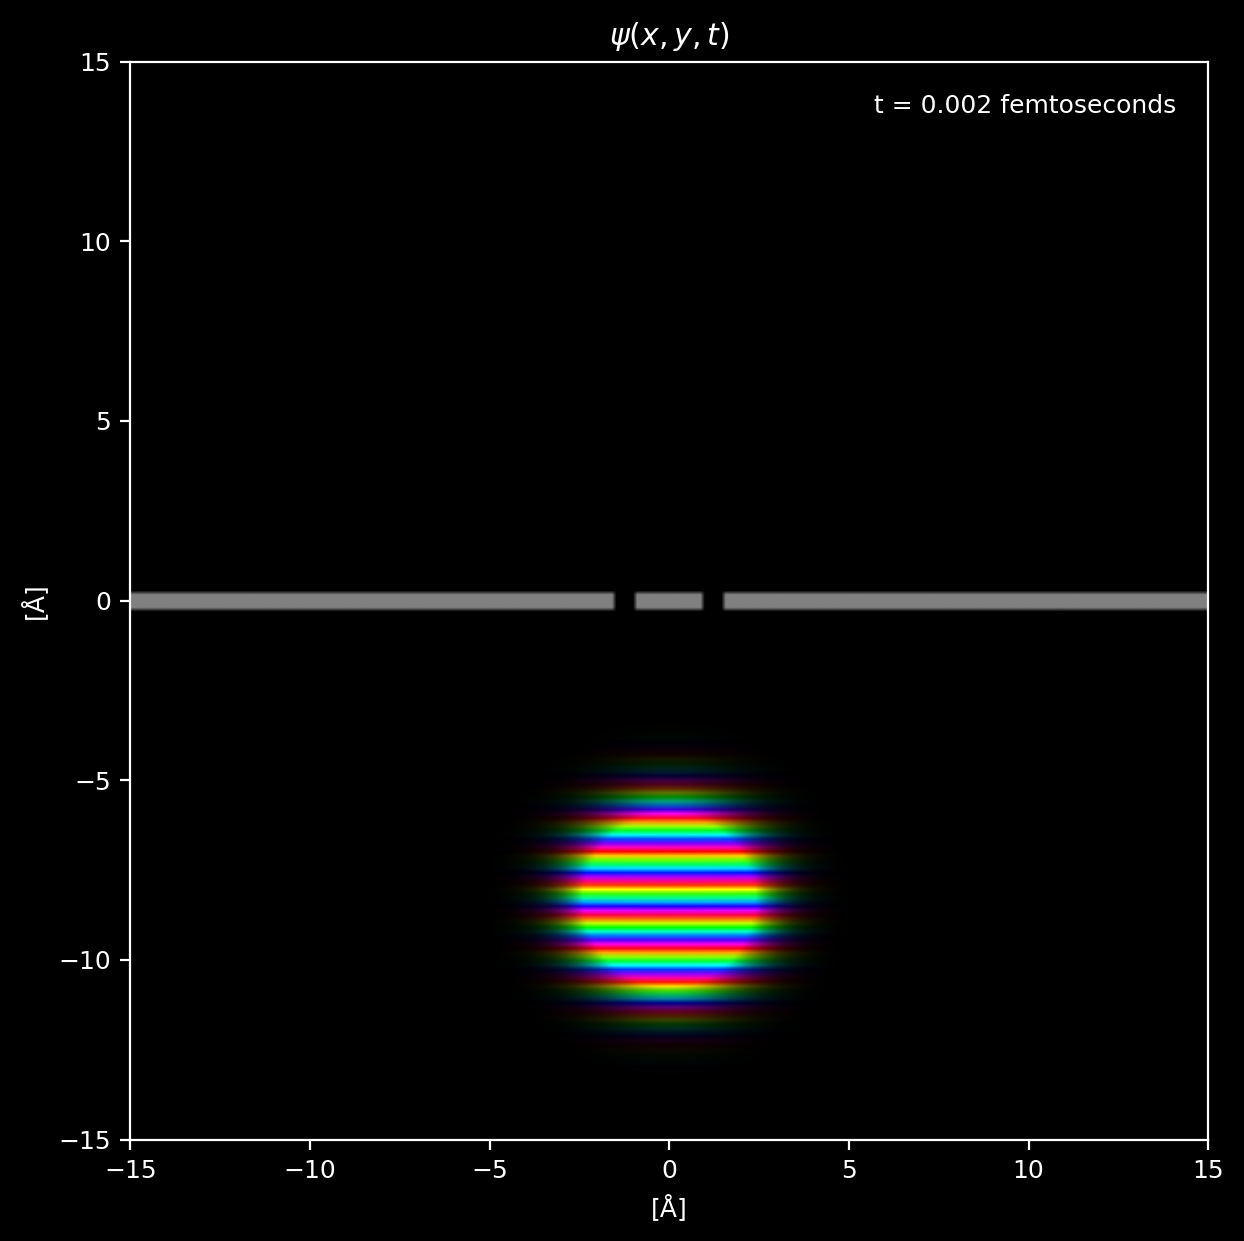

In [27]:
simulation = TimeSimulation(hamiltonian=Hamiltonian,method="splitstep")
simulation.RunSimulation(InitialWaveFunction,totalTime=totalTime,dt=totalTime/8000.,storeSteps=800)
visualization = InitialVisualization(simulation)
visualization.Animate(xlim=[-15*Å,15*Å],ylim=[-15*Å,15*Å],potential_saturation=0.5,wavefunction_saturation=0.2,animation_duration=10,fps=30)